In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns

In [2]:
df = pd.read_csv('../Conundrum7/Conundrum7Data.csv')

In [3]:
df.head()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
0,7394816,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,4
1,7394745,E12000001,H,5,1,1,4,1,2,1,1,1,2,1,8,6,4,3
2,7395066,E12000001,H,3,1,2,4,1,2,1,1,1,1,1,6,11,3,4
3,7395329,E12000001,H,3,1,2,2,1,2,1,2,1,2,1,7,7,3,2
4,7394712,E12000001,H,3,1,1,5,4,2,1,1,1,2,1,1,4,3,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569741 entries, 0 to 569740
Data columns (total 18 columns):
Person ID                    569741 non-null int64
Region                       569741 non-null object
Residence Type               569741 non-null object
Family Composition           569741 non-null int64
Population Base              569741 non-null int64
Sex                          569741 non-null int64
Age                          569741 non-null int64
Marital Status               569741 non-null int64
Student                      569741 non-null int64
Country of Birth             569741 non-null int64
Health                       569741 non-null int64
Ethnic Group                 569741 non-null int64
Religion                     569741 non-null int64
Economic Activity            569741 non-null int64
Occupation                   569741 non-null int64
Industry                     569741 non-null int64
Hours worked per week        569741 non-null int64
Approximated Social 

In this case, there is not missing values, but we apply the `dropna()` function as sanity check. Remember that we are able to drop rows or columns without information in the case when all the cells (or any of them) have missing values through the parameters `axis` (0 by default that means 'index' and 1 meaning 'columns') and `how` ('any' as default or 'all').

In [5]:
df.dropna(axis=0, how='any', inplace=True)

Drop possible duplicates rows:

In [6]:
df.drop_duplicates(keep='first', inplace=True)

Check the number of rows and columns after dropping missing values and duplicates inputs:

In [7]:
df.shape

(569741, 18)

It seems like there is not missing values and every inputs belongs to an unique ID person. Let's group the people polled by `Region`, `residence Type`, `Sex`, `Age` and `Marital Status`:

In [8]:
df_region = pd.DataFrame({'region_name':['North East','North West','Yorkshire and the Humber',
                                        'East Midlands','West Midlands','East of England',
                                        'London','South East','South West','Wales']},
                         index=['E12000001', 'E12000002', 
                                 'E12000003', 'E12000004', 
                                 'E12000005', 'E12000006', 
                                 'E12000007', 'E12000008',
                                 'E12000009', 'W92000004'])

In [9]:
df_group = df.copy()
df_group['counter'] = 1

In [10]:
df_groupRegion = df_group.groupby('Region').count().sort_values(by='Person ID', ascending=False).counter

In [11]:
pd.concat([df_groupRegion, df_region], axis=1, sort=False)

,counter,region_name
E12000008,88084,South East
E12000007,83582,London
E12000002,71436,North West
E12000006,59411,East of England
E12000005,56875,West Midlands
E12000009,53774,South West
E12000003,53471,Yorkshire and the Humber
E12000004,45782,East Midlands
W92000004,30977,Wales
E12000001,26349,North East


In [12]:
df_groupRegionSex = df_group.groupby(['Region', 'Sex']).count().sort_values(by='Person ID', ascending=False).counter

In [16]:
sex = pd.DataFrame({'Sex':[1,2], 'Initials':['M', 'F']})

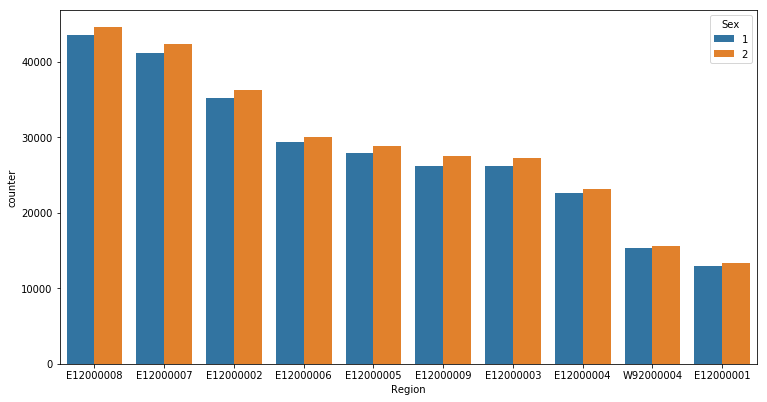

In [19]:
_ = plt.figure(figsize=(12.5, 6.5))
_ = sns.barplot(x='Region', y='counter', hue="Sex", data=df_groupRegionSex.reset_index())